# Palmer Penguins

The Palmer Penguins dataset contains morphological measurements for 344 penguins observed on islands in the Palmer Archipelago, Antarctica. It serves as an alternative to the Iris dataset for classification and exploratory data analysis tasks.

- Instances: 344 individual penguins

- Species (targets): Adelie, Gentoo, Chinstrap

- Features:

        island

        bill_length_mm

        bill_depth_mm

        flipper_length_mm
  
        body_mass_g

The dataset is useful for visualizing clustering, classification, and understanding biological variation across species.


<p align="center">
    <img src="../images/adelie_penguin.png" width="200"/> Adelie &nbsp;&nbsp;&nbsp;&nbsp;
    <img src="../images/gentoo_penguin.png" width="200"/> Gentoo &nbsp;&nbsp;&nbsp;&nbsp;
    <img src="../images/chinstrap_penguin.png" width="150"/> Chinstrap
</p>


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

import warnings
warnings.filterwarnings("ignore")


In [24]:
from palmerpenguins import load_penguins
penguins = load_penguins()

In [25]:
penguins.head(len(penguins))


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


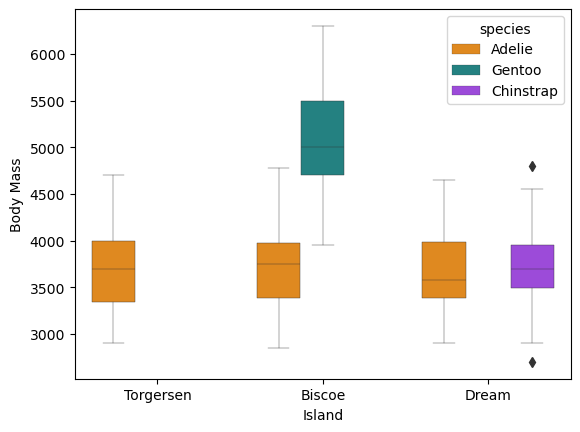

In [26]:
import seaborn as sns

g = sns.boxplot(x = 'island',y ='body_mass_g',hue = 'species',data = penguins,palette=['#FF8C00','#159090','#A034F0'],linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')
plt.show()

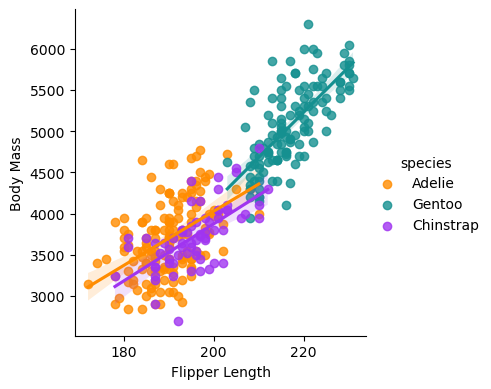

In [27]:
g = sns.lmplot(x="flipper_length_mm",y="body_mass_g",hue="species",height=4,data=penguins,palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Flipper Length')
g.set_ylabels('Body Mass')
plt.show()

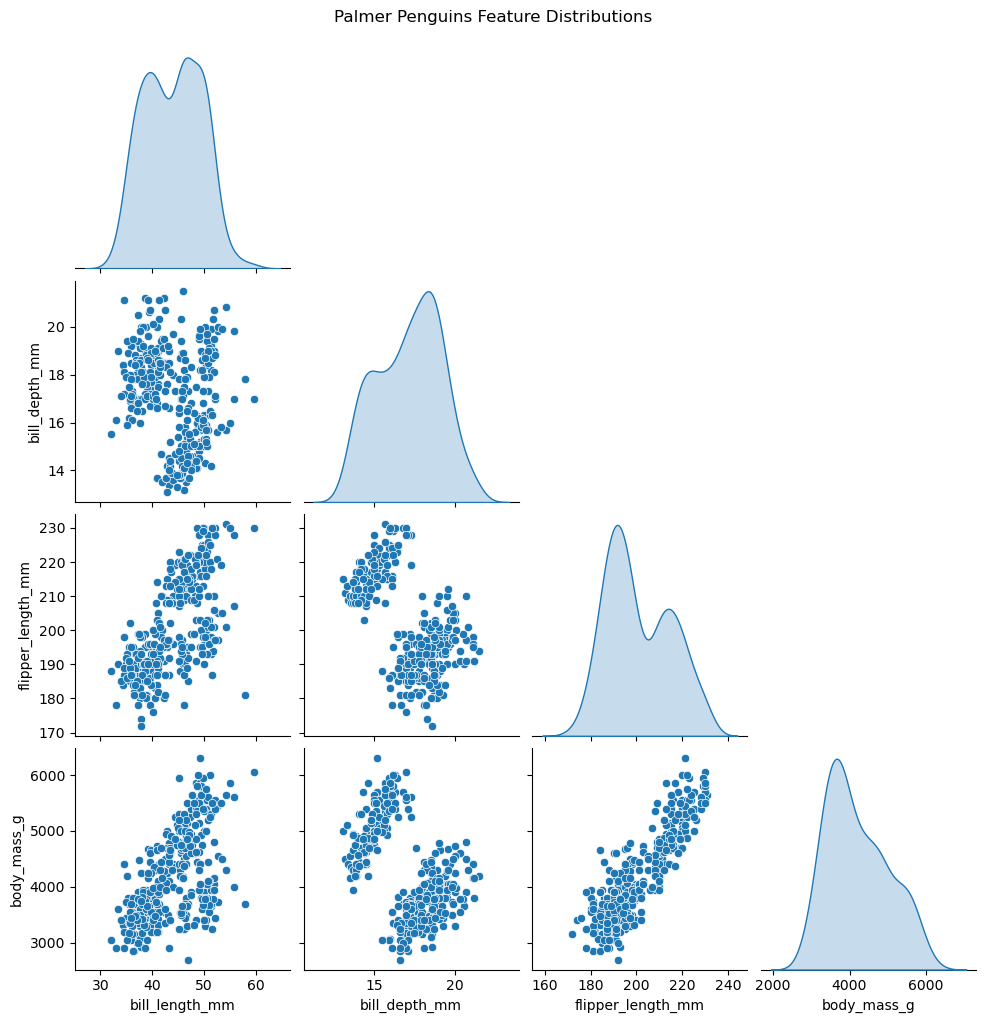

In [28]:
# Drop rows with missing values (corner plots require complete data)
penguins = penguins.dropna()

# Select only numeric features
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create the corner/pair plot
sns.pairplot(penguins[features], corner=True, diag_kind='kde')
plt.suptitle("Palmer Penguins Feature Distributions", y=1.02)
plt.show()

### Clustering with K-means

$K$-means seeks to minimize the following

$$\sum_{k=1}^{K}\sum_{i\in C_k}||x_i - \mu_k||^2$$

where $\mu_k = \frac{1}{N_k}\sum_{i\in C_k} x_i$

In words, this says to
  * Take every object in class $C_k$ (as determined by which centroid it is closest to, specifically $C_k(x_i) = \arg \min_k ||x_i-\mu_k||)$
  * Compute the mean of the objects in that class
  * Subtract that mean from each member of that class and square the norm
  * Do that for each class and sum
  * Shift the centroids of the *pre-determined* number of classes until this sum is minimized
  * Do this multiple times with different starting centroids and take the result with the minimum sum


K-means clustering stops when convergence is reached, which typically means no further change in cluster assignments or centroids. More precisely, it can stop when one of the following happens:

1. Centroids Don't Change (Convergence Criterion). After an iteration, the new centroids are the same as the previous ones (or within a very small tolerance). This means the clusters are stable, and assigning points again won't change anything.

2. Maximum Number of Iterations Reached: to avoid infinite loops, implementations often set a maximum number of iterations (e.g., max_iter=300 in sklearn).
3. 
4. Very Small Change in Centroids (Tolerance Threshold). Instead of checking for exact equality (which is rare in floating point numbers), most implementations check if the movement of centroids is smaller than a tolerance.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Select features (bill length & bill depth) and target (species)
#X = penguins[['bill_length_mm', 'bill_depth_mm']].values
X = penguins[['flipper_length_mm', 'body_mass_g', 'bill_length_mm', 'bill_depth_mm']].values
y = penguins['species'].values

# Encode species labels into numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train k-NN classifier
n_neighbors = 3  # Adjust as needed
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)

# Evaluate accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.99


Model Accuracy: 0.96


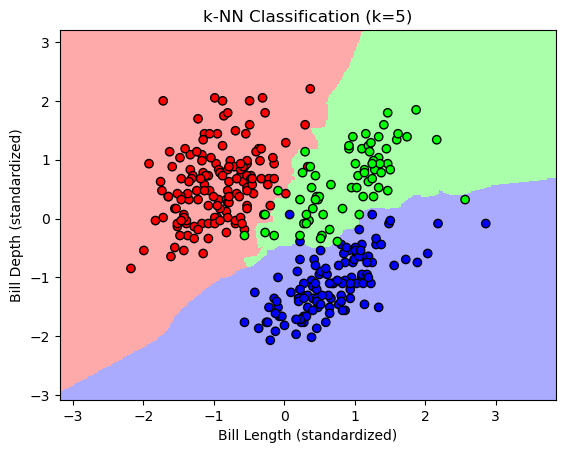

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Select features (bill length & bill depth) and target (species)
X = penguins[['bill_length_mm', 'bill_depth_mm']].values
#X = penguins[['flipper_length_mm', 'body_mass_g']].values
y = penguins['species'].values

# Encode species labels into numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train k-NN classifier
n_neighbors = 5  # Adjust as needed
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)

# Evaluate accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Plot decision boundary
h = 0.02  # Step size for mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define colormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
plt.xlabel("Bill Length (standardized)")
plt.ylabel("Bill Depth (standardized)")
plt.title(f"k-NN Classification (k={n_neighbors})")

plt.show()


In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def kmeans_animation(X, K=3, n_iter=10, figsize=(8, 8), interval=200, seed=None):
    """
    Animate K-means clustering algorithm on 2D data.
    
    Parameters:
        X (array): 2D numpy array of shape (n_samples, 2)
        K (int): number of clusters
        n_iter (int): number of K-means iterations
        figsize (tuple): figure size
        interval (int): delay between frames in ms
        seed (int or None): random seed for reproducibility
    
    Returns:
        HTML animation object
    """
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)

    fig, ax = plt.subplots(figsize=figsize)
    col = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'brown'][:K]

    # Random initial centroids
    means = np.array([random.choice(X) for _ in range(K)])

    # Initial scatter plot
    sc = ax.scatter(X[:, 0], X[:, 1], c='black', s=30, edgecolor='k')
    centroid_scatter = ax.scatter(means[:, 0], means[:, 1], c=col, s=100, marker='X')

    def update(frame):
        nonlocal means

        # Assign each point to the nearest centroid
        labels = []
        kmeans_loss = 0
        for x in X:
            distances = [np.linalg.norm(x - mean) for mean in means]
            min_idx = np.argmin(distances)
            labels.append(min_idx)
            kmeans_loss += distances[min_idx]**2

        labels = np.array(labels)
        sc.set_color([col[label] for label in labels])

        # Update centroids
        new_means = []
        for k in range(K):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_means.append(np.mean(cluster_points, axis=0))
            else:
                new_means.append(means[k])  # No change if empty cluster

        means = np.array(new_means)
        centroid_scatter.set_offsets(means)
        ax.set_title(f"K-means (Iteration {frame + 1}) – Loss: {kmeans_loss:.2f}")
        return sc, centroid_scatter

    ani = FuncAnimation(fig, update, frames=n_iter, interval=interval, repeat=False)
    plt.close()
    return HTML(ani.to_jshtml())


In [15]:
# X_train is assumed to be your 2D data (shape: [n_samples, 2])
kmeans_animation(X_train[:, :2], K=3, n_iter=10, seed=42)

# Mean-shift Clustering <a class="anchor" id="twob"></a>

**Mean-shift clustering** works by finding the modes in a kernel density estimator of the distribution. Clustering is achieved by the ***mean-shift algorithm***:

1. The KDE of the dataset is computed.
2. This allows the gradient of the distribution to be calculated. Easy to do since it's a bunch of overlapping Gaussians.
3. Each data point is shifted in the direction of increasing gradient, which drives the points toward the modes. 
4. This process is iterated until all points have converged with clusters of other points at each of several distinct modes.
5. Each data point is then associated with a cluster of other points.


The **bandwidth** controls the size of the neighborhood that influences the density estimation.
- A large bandwidth smooths over local modes → collapse into one.
- A small bandwidth allows local maxima to form → more clusters.

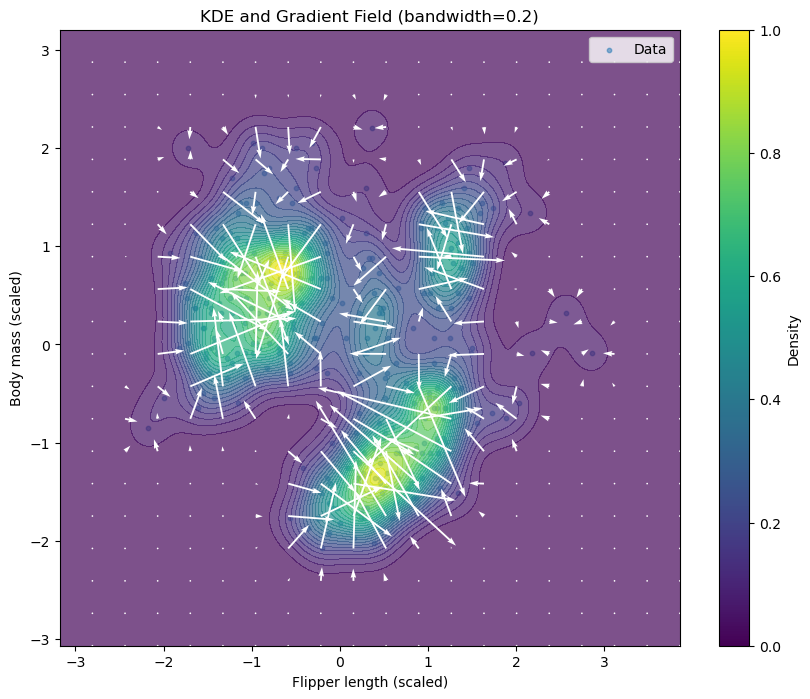

In [33]:
from sklearn.neighbors import KernelDensity
from scipy.interpolate import RegularGridInterpolator

# --- Select only two features: e.g., flipper_length and body_mass ---
X_2d = X[:, [0, 1]]  # Assuming these are flipper_length_mm and body_mass_g

# --- Fit KDE ---
bandwidth = 0.2  # You can experiment with this
kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
kde.fit(X_2d)

# --- Create grid for KDE evaluation ---
x_min, y_min = X_2d.min(axis=0) - 1
x_max, y_max = X_2d.max(axis=0) + 1

x = np.linspace(x_min, x_max, 200)
y = np.linspace(y_min, y_max, 200)
xx, yy = np.meshgrid(x, y)
grid_points = np.vstack([xx.ravel(), yy.ravel()]).T  # Shape: (N, 2)

# --- Evaluate KDE on grid ---
log_density = kde.score_samples(grid_points)
density = np.exp(log_density).reshape(xx.shape)

# --- Compute gradients of the density ---
grad_y, grad_x = np.gradient(density, y[1] - y[0], x[1] - x[0])

# --- Create interpolators for the gradients ---
interp_grad_x = RegularGridInterpolator((y, x), grad_x)
interp_grad_y = RegularGridInterpolator((y, x), grad_y)

# --- Coarse grid for vector field ---
Xq, Yq = np.meshgrid(np.linspace(x_min, x_max, 20),
                     np.linspace(y_min, y_max, 20))
points = np.vstack([Yq.ravel(), Xq.ravel()]).T  # Order: (y, x)

# --- Evaluate gradients on coarse grid ---
Gx = interp_grad_x(points).reshape(Xq.shape)
Gy = interp_grad_y(points).reshape(Yq.shape)

# --- Plot everything ---
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=10, alpha=0.5, label='Data')
plt.contourf(xx, yy, density, levels=30, cmap='viridis', alpha=0.7)
plt.quiver(Xq, Yq, Gx, Gy, color='white', angles='xy')
plt.colorbar(label='Density')
plt.xlabel('Flipper length (scaled)')
plt.ylabel('Body mass (scaled)')
plt.title(f'KDE and Gradient Field (bandwidth={bandwidth})')
plt.legend()
plt.show()

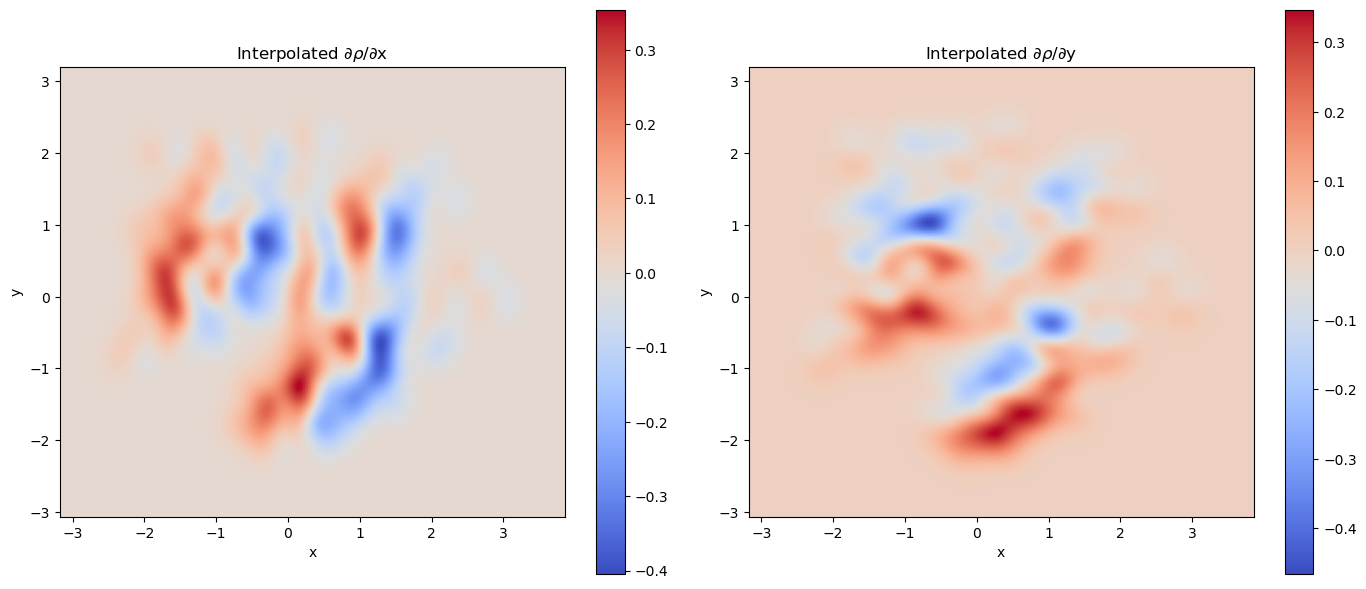

In [34]:
# Flatten meshgrid for interpolation: shape (N, 2)
mesh_points = np.vstack([yy.ravel(), xx.ravel()]).T  # (y, x) order

# Evaluate interpolated gradients on the mesh
interp_vals_x = interp_grad_x(mesh_points).reshape(xx.shape)
interp_vals_y = interp_grad_y(mesh_points).reshape(yy.shape)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

im0 = axes[0].imshow(interp_vals_x, extent=(x.min(), x.max(), y.min(), y.max()),
                     origin='lower', cmap='coolwarm')
axes[0].set_title('Interpolated ∂$\\rho$/∂x')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
fig.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(interp_vals_y, extent=(x.min(), x.max(), y.min(), y.max()),
                     origin='lower', cmap='coolwarm')
axes[1].set_title('Interpolated ∂$\\rho$/∂y')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
fig.colorbar(im1, ax=axes[1])

plt.tight_layout()
plt.show()

In [35]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def Animate_Mean_Clustering(X,KDE_bandwidth,dX,frames):
    
    fig, ax = plt.subplots()
    scat = ax.scatter(X[:, 0], X[:, 1])
    
    x_min, y_min = X.min(axis=0) - 4
    x_max, y_max = X.max(axis=0) + 4   

    x = np.linspace(x_min, x_max, 200)
    y = np.linspace(y_min, y_max, 200)  # 200?
    
    xx, yy = np.meshgrid(x,y)
    grid_points = np.vstack([xx.ravel(), yy.ravel()]).T

    def update(frame):
        global X

        if frame == 0:
            scat.set_offsets(X)
            return scat,

    
        # --- Fit KDE ---
        kde = KernelDensity(bandwidth=KDE_bandwidth, kernel='gaussian')
        kde.fit(X)

        # Evaluate KDE on grid (log density)
        log_density = kde.score_samples(grid_points)
        density = np.exp(log_density).reshape(xx.shape)

        grad_x, grad_y = np.gradient(density, x[1] - x[0], y[1] - y[0])         
        interp_grad_x = RegularGridInterpolator((y, x), grad_x, bounds_error=False, fill_value=0)
        interp_grad_y = RegularGridInterpolator((y, x), grad_y, bounds_error=False, fill_value=0)  

        Gx = interp_grad_x(X)
        Gy = interp_grad_y(X)
        
        normalization = np.sqrt(Gx**2 + Gy**2)
        #print(normalization[normalization == 0])
        #if normalization == 0: print(normalization)
        #normalization[normalization == 0] = 1  # prevent div by zero

        unit_versor = np.vstack([Gx / normalization, Gy / normalization]).T
        X += dX * unit_versor
        scat.set_offsets(X)
        return scat,

    ani = FuncAnimation(fig, update, frames=frames, interval=100, blit=True)
    
    display(HTML(ani.to_jshtml()))
    plt.close()

In [36]:
Animate_Mean_Clustering(X,KDE_bandwidth=0.2,dX=0.1,frames=30)

In [12]:
Animate_Mean_Clustering(X,KDE_bandwidth=0.6,dX=0.1,frames=30)